# ***Modelo de Clasificación Random Forest Classifier***

In [35]:
%load_ext kedro.ipython 

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [36]:
catalog.keys()


[
    'DataSetFIFA22',
    'DataSetFIFA21',
    'DataSetFIFA20',
    'preprocess_fifa_22',
    'preprocess_fifa_21',
    'preprocess_fifa_20',
    'FIFA22_processed_con_transformacion2_columns',
    'FIFA21_processed_con_transformacion2_columnss',
    'FIFA20_processed_con_transformacion2_columns',
    'grid_linear_model',
    'grid_linear_multiple_model',
    'grid_svr_model',
    'grid_decision_tree_model',
    'grid_randomforest_model',
    'grid_logistic_model_classification',
    'grid_knn_model_classification',
    'grind_svc_cv_model_classification',
    'grid_decision_tree_model_classification',
    'grid_random_forest_model_classification',
    'X_train_regression',
    'X_test_regression',
    'y_test_regression',
    'X_train_class',
    'X_test_class',
    'y_train_class',
    'y_test_class',
    'regression_report_linear_simple',
    'regression_report_linear_multiple',
    'regression_report_svr',
    'regression_report_decision_tree',
    'regression_report_randomforest

In [37]:
catalog.load("model_input_table")

[11/21/25 00:15:32] INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=930929;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=665378;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,Height_cm,Weight_kg,Value_num,Wage_num,Release Clause_num,Best_Position_Grouped_FW,Best_Position_Grouped_GK,Best_Position_Grouped_MF,Overall_Class_Encoded,Year
0,Bruno Fernandes,26,Portugal,88,89,Manchester United,2341,Right,3.0,3.0,...,179,69.000000,107500000.0,250000.0,206900000.0,False,False,True,0,2022
1,L. Goretzka,26,Germany,87,88,FC Bayern München,2314,Right,4.0,4.0,...,189,82.000000,93000000.0,140000.0,160400000.0,False,False,True,0,2022
2,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,2307,Right,5.0,4.0,...,182,83.000000,44500000.0,135000.0,91200000.0,True,False,False,0,2022
3,M. Acuña,29,Argentina,84,84,Sevilla FC,2292,Left,2.0,3.0,...,172,69.000000,37000000.0,45000.0,77700000.0,False,False,False,0,2022
4,J. Kimmich,26,Germany,89,90,FC Bayern München,2283,Right,4.0,4.0,...,177,75.000000,108000000.0,160000.0,186300000.0,False,False,True,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50521,V. Storsve,17,Norway,50,72,Lillestrøm SK,773,Right,1.0,2.0,...,185,64.863656,50000.0,5000.0,113000.0,False,True,False,1,2020
50522,B. Sinzig,19,Switzerland,50,60,Neuchâtel Xamax,764,Right,1.0,2.0,...,190,81.192968,35000.0,5000.0,58000.0,False,True,False,1,2020
50523,18 N. Krucker,18,Switzerland,50,61,FC St. Gallen,757,Right,1.0,3.0,...,183,79.832192,35000.0,1000.0,66000.0,False,True,False,1,2020
50524,18 A. Viscovo,18,Italy,51,70,Crotone,755,Right,1.0,2.0,...,190,78.925008,60000.0,5000.0,146000.0,False,True,False,1,2020


In [38]:
df_FIFA = catalog.load("model_input_table")

                    INFO     Loading data from model_input_table (ParquetDataset)...           ]8;id=50660;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=975033;file://C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

#### **Importaciones**

In [39]:
# -- Tratamiento de datos --
import numpy as np
import pandas as pd

# -- Gráficos -- 
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb


# -- Procesado y modelado --
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
#---- Para el balanceo de datos ----
from imblearn.over_sampling import SMOTE # Esta importacion no es obligatoria, sino que se usa en el contexto en caso de tener clases 
                                         # desbalanceadas. eje: clase 1 tiene 1000 datos y clase 2 tiene 500. (probablemente existan otras librerias que apliten distintos metodos de balance)
                                         # Se realiza pip install imbalanced-learn en kedro.

# -- Metricas para modelos de clasificación --
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

#----  Curva ROC y PR ----
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score

# -- GridSearchCV -- 
from sklearn.model_selection import GridSearchCV

#### **Selección de caracteristicas**

In [40]:
X = df_FIFA[["Age","Finishing","Dribbling","International Reputation"]]
y = df_FIFA[['Overall_Class_Bin']]

#### **División de los datos en entrenamiento y prueba**

**SMOTE para clases desbalnanceadas por ejemplo:**

- Si tienes 900 ejemplos de clase “A” y solo 100 ejemplos de clase “B” el modelo tenderá a aprender más de “A” que de “B”.
- SMOTE genera nuevos casos artificiales de “B” para igualar el número de muestras.

In [41]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### **Creación y entrenamiento del modelo Linear Regression**

In [42]:
model = RandomForestClassifier(
    bootstrap = True, # tambien esta en true por defecto
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight={0: 1, 1: 2.8},
    random_state=42,
    n_jobs=-1
) 
model.fit(X_train, y_train)

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\base.py:1473: DataConversionWarning: A column-vector y was passed                
                             when a 1d array was expected. Please change the shape of y to                         
                             (n_samples,), for example using ravel().                                              
                               return fit_method(estimator, *args, **kwargs)                                       
                                                                                                                   

RandomForestClassifier(class_weight={0: 1, 1: 2.8}, n_jobs=-1, random_state=42)

#### **Predicciones sobre el conjunto de prueba**

In [43]:
y_pred = model.predict(X_test)

### **Métricas de evaluación**

In [44]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6501 1029]
 [ 742 6714]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      7530
           1       0.87      0.90      0.88      7456

    accuracy                           0.88     14986
   macro avg       0.88      0.88      0.88     14986
weighted avg       0.88      0.88      0.88     14986



#### **Calculando Sensitivity Y Specificity**

In [45]:
cm = confusion_matrix(y_test, y_pred)

# Extrae los valores de la matriz de confusión
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calcula la sensibilidad (Recall)
sensitivity = TP / (TP + FN)

# Calcula la especificidad
specificity = TN / (TN + FP)

print(f"\nSensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


Sensitivity: 0.9005
Specificity: 0.8633


#### **Curva ROC**

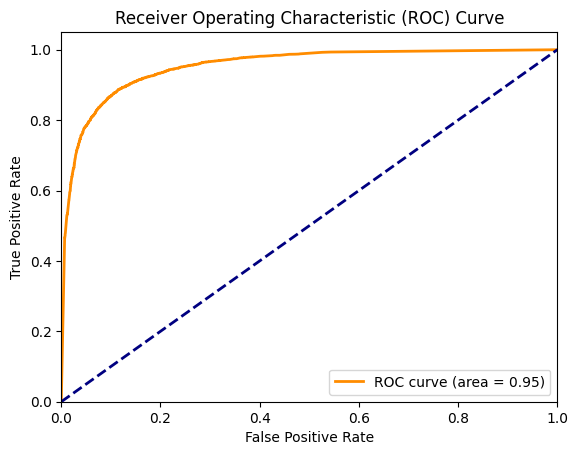

In [46]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### **Curva ROC**

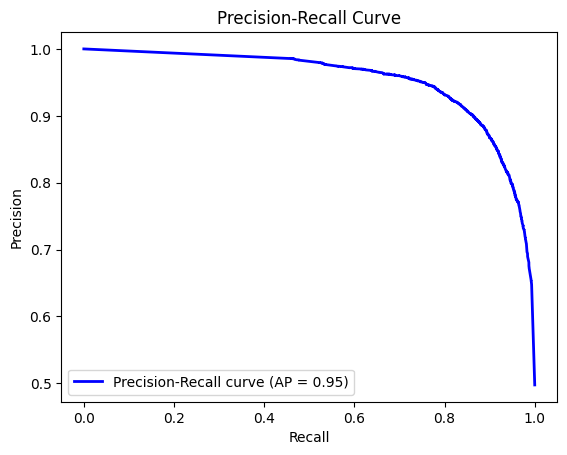

In [47]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### **GridsearchCV**

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[11/21/25 00:17:46] WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\num warnings.py:110
                             py\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast                 
                               _data = np.array(data, dtype=dtype, copy=copy,                                      
                                                                                                                   

                    WARNING  C:\Users\brand\Downloads\Proyecto_ML_Kedro\.venv\Lib\site-packages\skl warnings.py:110
                             earn\base.py:1473: DataConversionWarning: A column-vector y was passed                
                             when a 1d array was expected. Please change the shape of y to                         
                             (n_samples,), for example using ravel().                                              
                               return fit_method(estimator, *args, **kwargs)                                       
                                                                                                                   

Mejores parámetros: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Reporte de Clasificación (Grid Search):
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7530
           1       0.89      0.88      0.88      7456

    accuracy                           0.89     14986
   macro avg       0.89      0.89      0.89     14986
weighted avg       0.89      0.89      0.89     14986


Matriz de Confusión (Grid Search):


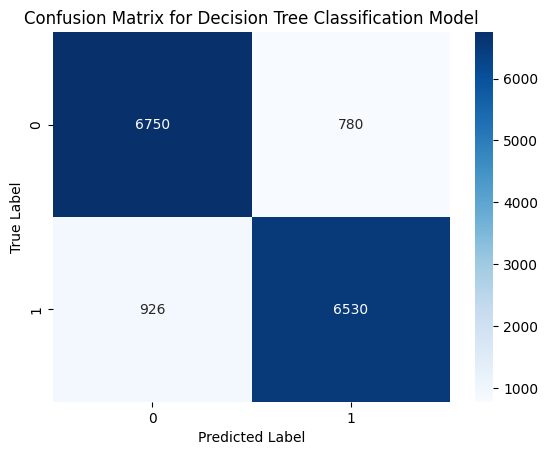


Accuracy Score (Grid Search):
0.8861604163886294


In [48]:
param_grid = {
    'n_estimators': [108, 200],
    'class_weight': ['balanced', {0:1, 1:2.2}, {0:1, 1:2.4}, {0:1, 1:2.6}],
    'max_depth': [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Get the best model
best_grid = grid_search.best_estimator_

# Make predictions with the best model
grid_predictions = best_grid.predict(X_test)

print("\nReporte de Clasificación (Grid Search):")
print(classification_report(y_test, grid_predictions))

# Evaluate the best model
print("\nMatriz de Confusión (Grid Search):")
sb.heatmap(confusion_matrix(y_test, grid_predictions), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree Classification Model")
plt.show()


print("\nAccuracy Score (Grid Search):")
print(accuracy_score(y_test, grid_predictions))


#### **Sensitivity y Specificity modelo con GridSearchCV**

In [49]:
cm_best = confusion_matrix(y_test, grid_predictions)

TN_best = cm_best[0, 0]
FP_best = cm_best[0, 1]
FN_best = cm_best[1, 0]
TP_best = cm_best[1, 1]

sensitivity_best = TP_best / (TP_best + FN_best)
specificity_best = TN_best / (TN_best + FP_best)

print(f"\nSensitivity (Best Model): {sensitivity_best:.4f}")
print(f"Specificity (Best Model): {specificity_best:.4f}")


Sensitivity (Best Model): 0.8758
Specificity (Best Model): 0.8964


#### **Curva Roc y Curva PR de GridSearchCV**

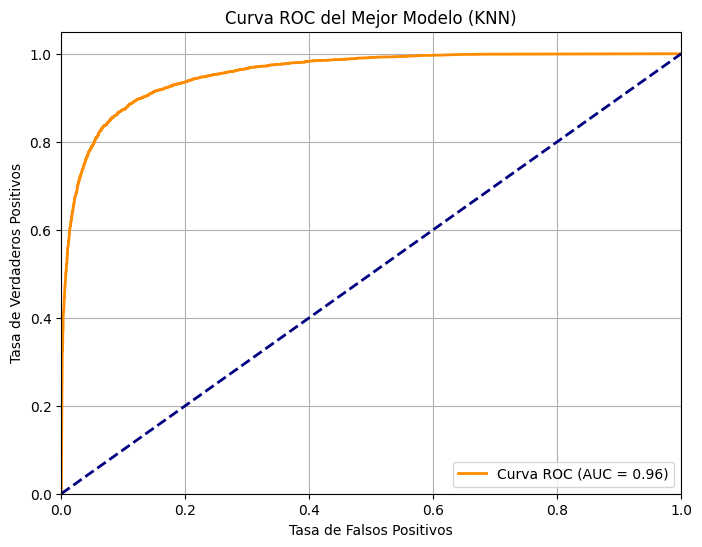

-


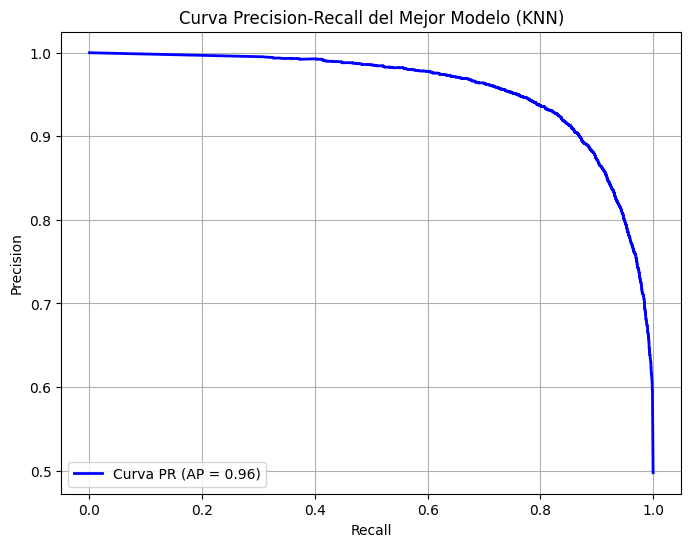

In [50]:
# Probabilidades para la clase positiva
y_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# === CURVA ROC ===
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Mejor Modelo (KNN)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("-")
# === CURVA PRECISIÓN-RECALL ===
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Curva PR (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall del Mejor Modelo (KNN)')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

#### **Importancia de las características**

Modelos que sí permiten feature_importances_

Árboles de decisión (DecisionTreeClassifier)

Random Forest (RandomForestClassifier)

Gradient Boosting (GradientBoostingClassifier, XGBClassifier)

Extra Trees (ExtraTreesClassifier)

[11/21/25 00:18:06] WARNING  C:\Users\brand\AppData\Local\Temp\ipykernel_53264\3905229553.py:14:    warnings.py:110
                             FutureWarning:                                                                        
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(x=sorted_importance.values, y=sorted_importance.index,                  
                             palette='viridis')                                                                    
                                                                                                                   

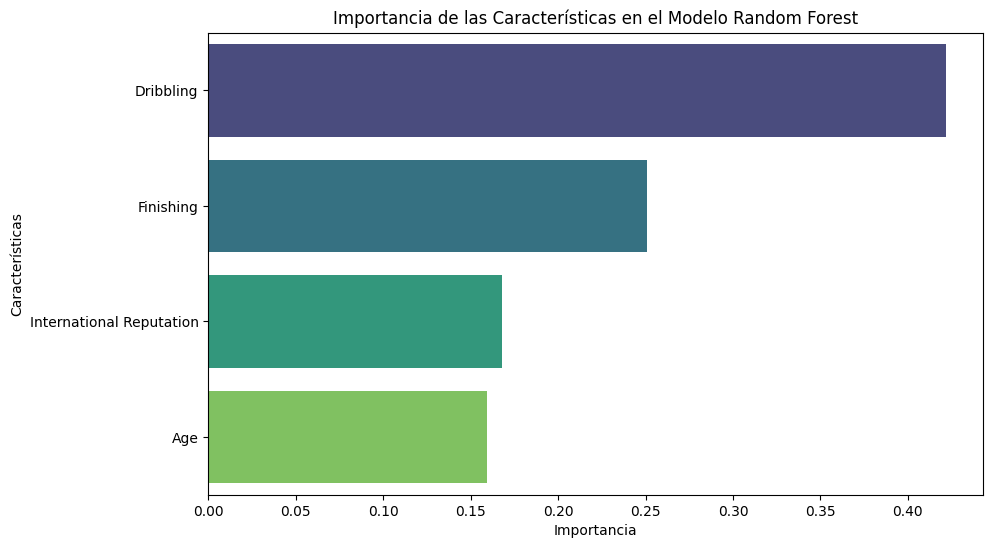

In [51]:
best_model = grid_search.best_estimator_ 
feature_importances = best_model.feature_importances_

features = X_train.columns

# Create a pandas Series to easily sort the importances
importance_series = pd.Series(feature_importances, index=features)

# Sort the features by importance
sorted_importance = importance_series.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance.values, y=sorted_importance.index, palette='viridis')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()